In [5]:
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

def configuration_analysis(filename, plot=True):
    # 读取数据
    filename = filename
    p = np.load(filename)
    p = np.delete(p, 1, axis=1) # 删除第二列

    #找出凸包边界上的点
    hull = ConvexHull(p)
    # 获取凸包的顶点索引
    hull_vertices = hull.vertices

    # 执行Delaunay三角剖分
    tri = Delaunay(p)

    #统计每个顶点被用于构成三角形的次数
    Np = np.zeros(p.shape[0])
    for a,b,c in tri.simplices:
        Np[a] += 1
        Np[b] += 1
        Np[c] += 1

    ex_7 = np.where(Np==7)[0]
    ex_7 = np.setdiff1d(ex_7, hull_vertices)  # 去除凸包上的点
    ex_5 = np.where(Np==5)[0]
    ex_5 = np.setdiff1d(ex_5, hull_vertices)  # 去除凸包上的点
    ex_other = np.where(np.logical_and(Np>7, Np<5))[0]
    ex_other = np.setdiff1d(ex_other, hull_vertices)  # 去除凸包上的点
    # print(ex_other)

    if plot is True:
        # 可视化结果
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        ax.triplot(p[:, 1], p[:, 0], tri.simplices, 'b-', lw=1)
        ax.scatter(p[:, 1], p[:, 0], c='r', marker='o', s=40, label='normal')  # 绘制所有点
        ax.scatter(p[hull_vertices, 1], p[hull_vertices, 0], c='r', marker='o', s=40, label='Hull')  # 绘制凸包上的点
        ax.scatter(p[ex_7, 1], p[ex_7, 0], c='black', marker='o', s=40, label='ex_7')  # 绘制奇异点（连接边数为7）
        ax.scatter(p[ex_5, 1], p[ex_5, 0], c='g', marker='o', s=40, label='ex_5')  # 绘制奇异点（连接边数为5）
        ax.scatter(p[ex_other, 1], p[ex_other, 0], c='white', marker='o', s=40, label='ex_others')  # 绘制奇异点（连接边数小于5或大于7）
        # ax.set_title("%d ions, round %d"%(Ni, round), fontsize=20)
        # ax.set_ylim(-20,20)
        # ax.set_xlim(-80,80)
        ax.set_ylabel('x(um)', fontsize=16)
        ax.set_xlabel('z(um)', fontsize=16)
        ax.tick_params(labelsize=16)
        ax.grid(True)
        ax.set_aspect('equal')
        plt.legend(loc='upper left', fontsize=16)
        plt.show()
    return hull_vertices, ex_7, ex_5, ex_other

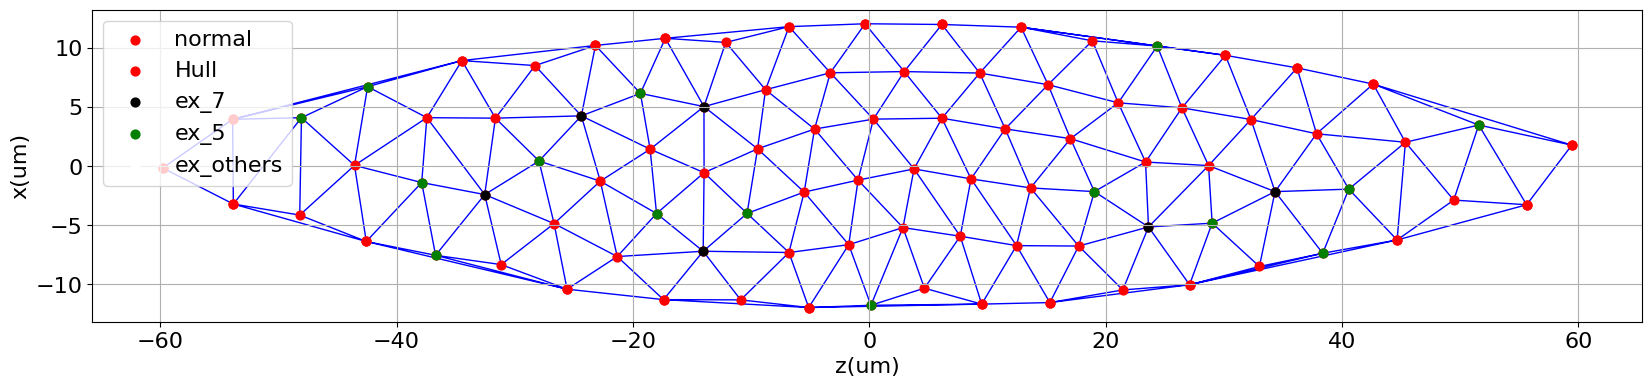

(array([77, 71, 63, 29, 37, 56, 83, 53, 90, 75, 61, 72, 21,  5, 66, 20,  2,
        47, 48, 34, 50, 51, 88], dtype=int32),
 array([19, 30, 45, 58, 79, 87]),
 array([ 3,  7, 15, 16, 17, 22, 24, 46, 52, 54, 62, 68, 69, 73, 82]),
 array([], dtype=int64))

In [6]:
filename = "../data_cache/r.npy"
configuration_analysis(filename)